Objective
1. We have a Muesli product raw data to find out the business problem.
2. Understand the delivery process for tracking the performance processes overall and at each stage
3. Develop KPI´s - Invent some metrics that would be useful for tracking the performance processes overall and at each stage
4. Find out how to reduce the lead time
5. Understand what leads to the increased time in the delivery process
6. Show how long an average order takes as well as how much variation exists for each stage
7. Conduct Descriptive, Diagnostics & Visual Analysis.


Key metrics:
1. Order processing time - The average time taken to process an order from the time it is received until it is marked as "Ready to Ship."
2. On truck ratio - The percentage of orders that leave the warehouse on the truck on the same day they are marked as "Ready to Ship."
3. Promotional campaign and sales data
4. Delivery time efficiency -The number of orders delivered within the expected 3-day delivery time.
5. Express delivery time - The average time taken from order placement to order delivery, including processing and delivery time for express orders.
6. Standard delivery time - The average time taken from order placement to order delivery, including processing and delivery time for standard orders.
7. Missed delivery rate - The percentage of orders not delivered within the expected 3-day timeframe.
8. Warehouse processing efficiency - The percentage of orders that have recorded "Ready to Ship" dates on the same day of receiving the order.


I.  Set-up the work environment

In [290]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [291]:
# Floats (decimal numbers) should be displayed rounded with 2 decimal places
pd.options.display.float_format = "{:,.2f}".format
# Set style for plots
plt.style.use('fivethirtyeight') 

In [292]:
!pip install openpyxl

124980.75s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [293]:
!conda install -c anaconda openpyxl

124986.64s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.9.0
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



## Package Plan ##

  environment location: /opt/homebrew/Caskroom/miniconda/base/envs/nf_base

  added / updated specs:
    - openpyxl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.08.22 |       hca03da5_0         131 KB  anaconda
    et_xmlfile-1.1.0           |   py39hca03da5_0           9 KB  anaconda
    openpyxl-3.0.10            |   py39h1a28f6b_0         542 KB  anaconda
    openssl-3.0.12             |       h1a28f6b_0         4.5 MB  anaconda
    -----------------------------------------------------------

II. Understanding the dataset

In [365]:
# read in excel file and display rows of datset
df = pd.read_excel("Muesli Project raw data.xlsx", 
                   sheet_name=['Orders' ], header=1)


df_orders = df['Orders']

# Set columns of df_orders based on the second row
#df_orders.columns = df_orders.iloc[1]

# Slice df_orders excluding the first two rows
#df_orders = df_orders[2:]

# Reset the index of df_orders
df_orders.reset_index(drop=True, inplace=True)
df_orders.head()

,Index,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,"90,049.00",West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.00,11.77
1,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,"55,122.00",Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.00,19.77
2,48,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,"19,901.00",East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.00,3,0.00,4.95
3,60,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,"12,180.00",East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.00,2,0.00,3.30
4,63,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,"90,004.00",West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2,0.00,6.15


In [371]:
df1 = pd.read_excel("Muesli Project raw data.xlsx", sheet_name=['Order Process Data', 'InternData Study', 'Campaign Data'], header=0)
df_process_date = df1['Order Process Data']
df_intern = df1['InternData Study']
df_campaign = df1['Campaign Data']


In [341]:
#df_orders = df_orders.rename(columns={'Order Date': 'Order Date Sheet1'})
#df_process_date = df_process_date.rename(columns={'Order Date': 'Order Date Sheet2'})
#df_process_date

In [367]:
#df_process_date.columns = df_process_date.iloc[0]

# Drop the first row
#df_process_date = df_process_date[1:].reset_index(drop=True)
#df_process_date.rename(columns={'NaT': 'NewColumnName'}, inplace=True)
#df_process_date.rename(columns={('YourIndex', 'NaT'): 'Order Date'}, inplace=True, level=0)


df_process_date.head()

df_process_date


,Row ID,Order ID,Order Date,On Truck Scan Date,Ship Mode
0,3074,CA-2019-125206,2019-01-03,2019-01-07,Express
1,4919,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
2,4920,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
3,8604,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
4,8605,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
...,...,...,...,...,...
5894,908,CA-2020-143259,2020-12-30,2021-01-06,Standard Processing
5895,909,CA-2020-143259,2020-12-30,2021-01-06,Standard Processing
5896,1297,CA-2020-115427,2020-12-30,2021-01-06,Standard Processing
5897,1298,CA-2020-115427,2020-12-30,2021-01-06,Standard Processing


In [368]:
print(df_process_date.columns)

# Check if 'Order Date' is in the list of columns
if 'Order Date' in df_process_date.columns:
    # If present, print the first few rows of 'Order Date'
    print(df_process_date['Order Date'].head())
else:
    print("'Order Date' column not found in the DataFrame.")

Index(['Row ID', 'Order ID', 'Order Date', 'On Truck Scan Date', 'Ship Mode'], dtype='object')
0   2019-01-03
1   2019-01-02
2   2019-01-02
3   2019-01-03
4   2019-01-03
Name: Order Date, dtype: datetime64[ns]


In [329]:
df_process_date = df_process_date.rename(columns={'NaT': 'Order Date'})


In [369]:
print(df_process_date.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'On Truck Scan Date', 'Ship Mode'], dtype='object')


In [372]:
df_intern

,Order ID,Ready to Ship Date,Pickup Date
0,CA-2019-116540,2019-09-02,2019-09-03
1,CA-2019-116540,2019-09-02,2019-09-03
2,CA-2019-129847,2019-09-04,2019-09-04
3,CA-2019-129630,2019-09-04,2019-09-04
4,CA-2019-106278,2019-09-05,2019-09-06
...,...,...,...
285,CA-2020-105333,2020-12-04,2020-12-07
286,CA-2020-105333,2020-12-04,2020-12-07
287,US-2020-110576,2020-12-04,2020-12-07
288,CA-2020-119305,2020-12-04,2020-12-07


In [415]:
df_intern.shape

(290, 3)

In [373]:
df_campaign

,Order ID,Arrival Scan Date,Customer Name
0,CA-2019-109666,2019-05-03,Kunst Miller
1,CA-2019-138933,2019-05-03,Jack Lebron
2,CA-2019-130001,2019-05-03,Heather Kirkland
3,CA-2019-113061,2019-05-06,Ed Ludwig
4,CA-2019-162138,2019-05-06,Grace Kelly
...,...,...,...
328,CA-2020-129707,2020-05-08,Larry Hughes
329,CA-2020-125381,2020-05-08,Speros Goranitis
330,CA-2020-141733,2020-05-15,Rick Wilson
331,US-2020-104451,2020-05-15,Michelle Moray


In [414]:
df_campaign.shape

(333, 3)

In [ ]:
df_orders.columns

Index(['Index', 'Order ID', 'Order Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Origin Channel', 'Country/Region', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub-Category', 'Product ID',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object', name=1)

In [498]:
df_orders.describe()

,Index,Order Date,Postal Code,Sales,Quantity,Discount,Profit
count,"9,994.00",9994,"9,983.00","9,994.00","9,994.00","9,994.00","9,994.00"
mean,"4,997.50",2019-04-30 17:41:20.448269312,"55,245.23",229.86,3.79,0.16,28.66
min,1.00,2017-01-03 00:00:00,"1,040.00",0.44,1.00,0.00,"-6,599.98"
25%,"2,499.25",2018-05-23 00:00:00,"23,223.00",17.28,2.00,0.00,1.73
50%,"4,997.50",2019-06-26 00:00:00,"57,103.00",54.49,3.00,0.20,8.67
75%,"7,495.75",2020-05-14 00:00:00,"90,008.00",209.94,5.00,0.20,29.36
max,"9,994.00",2020-12-30 00:00:00,"99,301.00","22,638.48",14.00,0.80,"8,399.98"
std,"2,885.16",NaN,"32,038.72",623.25,2.23,0.21,234.26


In [499]:
df_process_date.describe()

,Row ID,Order Date,On Truck Scan Date,Time Difference
count,"5,896.00",5896,5896,5896
mean,"5,022.79",2020-02-29 07:32:33.867028480,2020-03-06 10:26:12.862957824,6 days 02:53:38.995929443
min,1.00,2019-01-03 00:00:00,2019-01-09 00:00:00,0 days 00:00:00
25%,"2,484.75",2019-09-11 00:00:00,2019-09-18 00:00:00,5 days 00:00:00
50%,"5,100.00",2020-03-16 00:00:00,2020-03-20 00:00:00,7 days 00:00:00
75%,"7,464.25",2020-09-14 00:00:00,2020-09-18 00:00:00,8 days 00:00:00
max,"9,994.00",2020-12-30 00:00:00,2021-01-06 00:00:00,12 days 00:00:00
std,"2,879.08",NaN,NaN,2 days 12:13:37.779972115


In [500]:
df_intern.describe()

,Ready to Ship Date,Pickup Date
count,290,290
mean,2020-06-18 15:08:41.379310336,2020-06-20 06:47:10.344827648
min,2019-09-02 00:00:00,2019-09-03 00:00:00
25%,2019-09-23 00:00:00,2019-09-23 12:00:00
50%,2020-11-10 00:00:00,2020-11-12 00:00:00
75%,2020-11-23 00:00:00,2020-11-23 00:00:00
max,2020-12-07 00:00:00,2020-12-09 00:00:00


In [501]:
df_campaign.describe()

,Arrival Scan Date
count,333
mean,2019-10-14 19:36:12.972973056
min,2019-05-03 00:00:00
25%,2019-09-09 00:00:00
50%,2019-10-21 00:00:00
75%,2019-12-16 00:00:00
max,2020-05-15 00:00:00


In [ ]:
# Let's have a look at the shape of our dataset, meaning how long and wide it is.
df_orders.shape

(9994, 19)

We have 9994 rows and 19 columns in our dataset

In [ ]:
# We now want to check out our data-types as well as get a feeling for possible missing values
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Index           9994 non-null   object
 1   Order ID        9994 non-null   object
 2   Order Date      9994 non-null   object
 3   Ship Mode       9994 non-null   object
 4   Customer ID     9994 non-null   object
 5   Customer Name   9994 non-null   object
 6   Origin Channel  9994 non-null   object
 7   Country/Region  9994 non-null   object
 8   City            9994 non-null   object
 9   State           9994 non-null   object
 10  Postal Code     9983 non-null   object
 11  Region          9994 non-null   object
 12  Category        9994 non-null   object
 13  Sub-Category    9994 non-null   object
 14  Product ID      9994 non-null   object
 15  Sales           9994 non-null   object
 16  Quantity        9994 non-null   object
 17  Discount        9994 non-null   object
 18  Profit  

In [ ]:
# check for duplicate rows in Order ID column
df_orders["Order ID"].duplicated().value_counts()

Order ID
False    5009
True     4985
Name: count, dtype: int64

In [ ]:
duplicates = df_orders[df_orders.duplicated(subset=["Order ID"], keep=False)]


duplicates.sort_values('Order ID')

1,Index,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit
8069,6288,CA-2017-100090,2017-07-08,Standard Class,EB-13705,Ed Braxton,Sales,United States,San Francisco,California,94122,West,Toasted Muesli,Sweetened,FUR-TA-10003715,502.49,3,0.20,-87.94
6507,6289,CA-2017-100090,2017-07-08,Standard Class,EB-13705,Ed Braxton,Sales,United States,San Francisco,California,94122,West,Power Muesli,Super Fibre Boost,OFF-BI-10001597,196.70,6,0.20,68.85
2644,3837,CA-2017-100363,2017-04-08,Standard Class,JM-15655,Jim Mitchum,Sales,United States,Glendale,Arizona,85301,West,Power Muesli,Nuts and more,OFF-PA-10004733,19.01,3,0.20,6.89
1173,3836,CA-2017-100363,2017-04-08,Standard Class,JM-15655,Jim Mitchum,Sales,United States,Glendale,Arizona,85301,West,Power Muesli,Maple Sweetened,OFF-FA-10000611,2.37,2,0.20,0.83
499,6572,CA-2017-100678,2017-04-18,Standard Class,KM-16720,Kunst Miller,Email,United States,Houston,Texas,77095,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000474,227.98,3,0.20,28.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5220,5933,US-2020-169551,2020-07-07,First Class,RL-19615,Rob Lucas,Email,United States,Philadelphia,Pennsylvania,19120,East,Power Muesli,Steel Cut,OFF-ST-10004835,13.39,3,0.20,1.00
2942,5931,US-2020-169551,2020-07-07,First Class,RL-19615,Rob Lucas,Email,United States,Philadelphia,Pennsylvania,19120,East,Power Muesli,Nuts and more,OFF-PA-10004100,15.55,3,0.20,5.44
4023,5932,US-2020-169551,2020-07-07,First Class,RL-19615,Rob Lucas,Email,United States,Philadelphia,Pennsylvania,19120,East,Special Projects Muesil,Only Oats,TEC-PH-10001363,683.99,2,0.40,-114.00
8328,5930,US-2020-169551,2020-07-07,First Class,RL-19615,Rob Lucas,Email,United States,Philadelphia,Pennsylvania,19120,East,Toasted Muesli,With Fruit,FUR-BO-10001519,87.21,3,0.50,-45.35


So we have data on 9994 values to analyze. In the dataset, the same order ID might appear more than ones. This means that the 9994 order IDs are not unique ID. In fact, among the 9994, we have 5009 unique ID.

In [ ]:
#print(df_orders[["Order ID", "Customer ID"]].dtypes)

#duplicates = df_orders[df_orders.duplicated(subset=["Order ID", "Customer ID"], keep=False)]

#df_orders["Order ID"] = df_orders["Order ID"].str.strip()
#df_orders["Customer ID"] = df_orders["Customer ID"].str.strip()

#duplicates

In [374]:
df_orders['Order Date'] = pd.to_datetime(df_orders['Order Date'], format='%d.%m.%Y')

df_orders.head(5)

,Index,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,"90,049.00",West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.00,11.77
1,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,"55,122.00",Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.00,19.77
2,48,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,"19,901.00",East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.00,3,0.00,4.95
3,60,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,"12,180.00",East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.00,2,0.00,3.30
4,63,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,"90,004.00",West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2,0.00,6.15


In [375]:
df_orders.describe()

,Index,Order Date,Postal Code,Sales,Quantity,Discount,Profit
count,"9,994.00",9994,"9,983.00","9,994.00","9,994.00","9,994.00","9,994.00"
mean,"4,997.50",2019-04-30 17:41:20.448269312,"55,245.23",229.86,3.79,0.16,28.66
min,1.00,2017-01-03 00:00:00,"1,040.00",0.44,1.00,0.00,"-6,599.98"
25%,"2,499.25",2018-05-23 00:00:00,"23,223.00",17.28,2.00,0.00,1.73
50%,"4,997.50",2019-06-26 00:00:00,"57,103.00",54.49,3.00,0.20,8.67
75%,"7,495.75",2020-05-14 00:00:00,"90,008.00",209.94,5.00,0.20,29.36
max,"9,994.00",2020-12-30 00:00:00,"99,301.00","22,638.48",14.00,0.80,"8,399.98"
std,"2,885.16",NaN,"32,038.72",623.25,2.23,0.21,234.26


In [ ]:
print(df_process_date.dtypes)
print(df_process_date.columns)

0
0                              int64
Row ID                        object
Order ID                      object
NaT                   datetime64[ns]
On Truck Scan Date            object
Ship Mode                     object
dtype: object
Index([0, 'Row ID', 'Order ID', NaT, 'On Truck Scan Date', 'Ship Mode'], dtype='object', name=0)


In [376]:


# Convert the columns to datetime
df_intern[['Ready to Ship Date', 'Pickup Date']] = df_intern[['Ready to Ship Date', 'Pickup Date']].apply(lambda x: pd.to_datetime(x, errors='coerce', format='%d.%m.%Y'))

In [377]:
df_intern[['Ready to Ship Date', 'Pickup Date']] = df_intern[['Ready to Ship Date', 'Pickup Date']].apply(lambda x: pd.to_datetime(x, errors='coerce', format='%d.%m.%Y'))


df_intern

,Order ID,Ready to Ship Date,Pickup Date
0,CA-2019-116540,2019-09-02,2019-09-03
1,CA-2019-116540,2019-09-02,2019-09-03
2,CA-2019-129847,2019-09-04,2019-09-04
3,CA-2019-129630,2019-09-04,2019-09-04
4,CA-2019-106278,2019-09-05,2019-09-06
...,...,...,...
285,CA-2020-105333,2020-12-04,2020-12-07
286,CA-2020-105333,2020-12-04,2020-12-07
287,US-2020-110576,2020-12-04,2020-12-07
288,CA-2020-119305,2020-12-04,2020-12-07


In [378]:
df_campaign['Arrival Scan Date'] = df_campaign['Arrival Scan Date'].apply(lambda x: pd.to_datetime(x, errors='coerce', format='%d.%m.%Y'))

df_campaign

,Order ID,Arrival Scan Date,Customer Name
0,CA-2019-109666,2019-05-03,Kunst Miller
1,CA-2019-138933,2019-05-03,Jack Lebron
2,CA-2019-130001,2019-05-03,Heather Kirkland
3,CA-2019-113061,2019-05-06,Ed Ludwig
4,CA-2019-162138,2019-05-06,Grace Kelly
...,...,...,...
328,CA-2020-129707,2020-05-08,Larry Hughes
329,CA-2020-125381,2020-05-08,Speros Goranitis
330,CA-2020-141733,2020-05-15,Rick Wilson
331,US-2020-104451,2020-05-15,Michelle Moray


In [428]:
# Assuming you have already converted 'Order Date' and 'Ready to Ship Date' to datetime format
df_orders['Order Date'] = pd.to_datetime(df_orders['Order Date'], format='%Y-%m-%d')
df_intern['Ready to Ship Date'] = pd.to_datetime(df_intern['Ready to Ship Date'], format='%Y-%m-%d')

# Merge DataFrames on 'Order ID'
merged_df = pd.merge(df_orders, df_intern, on='Order ID', how='inner')

# Calculate the time difference
merged_df['Time Difference'] = merged_df['Ready to Ship Date'] - merged_df['Order Date']

# Display the relevant columns
result_df = merged_df[['Order ID', 'Order Date', 'Ready to Ship Date', 'Time Difference']]
print(result_df)

           Order ID Order Date Ready to Ship Date Time Difference
0    CA-2020-119004 2020-11-23         2020-11-30          7 days
1    CA-2020-119004 2020-11-23         2020-11-30          7 days
2    CA-2020-119004 2020-11-23         2020-11-30          7 days
3    CA-2020-119004 2020-11-23         2020-11-30          7 days
4    CA-2020-119004 2020-11-23         2020-11-30          7 days
..              ...        ...                ...             ...
748  CA-2020-152142 2020-11-14         2020-11-16          2 days
749  US-2019-134488 2019-09-24         2019-10-01          7 days
750  CA-2020-103499 2020-11-20         2020-11-24          4 days
751  US-2020-165456 2020-11-30         2020-12-03          3 days
752  US-2020-109610 2020-11-25         2020-11-30          5 days

[753 rows x 4 columns]


In [401]:
# Calculate the time difference between order date and truck scan date
df_process_date['Time Difference'] = df_process_date['On Truck Scan Date'] - df_process_date['Order Date']

# Display the relevant columns
difference_df = df_process_date[['Order ID', 'Order Date', 'On Truck Scan Date', 'Time Difference']]
print(difference_df)

            Order ID Order Date On Truck Scan Date Time Difference
0     CA-2019-160304 2019-01-02         2019-01-09          7 days
1     CA-2019-160304 2019-01-02         2019-01-09          7 days
2     US-2019-116365 2019-01-03         2019-01-09          6 days
3     US-2019-116365 2019-01-03         2019-01-09          6 days
4     US-2019-116365 2019-01-03         2019-01-09          6 days
...              ...        ...                ...             ...
5893  CA-2020-143259 2020-12-30         2021-01-06          7 days
5894  CA-2020-143259 2020-12-30         2021-01-06          7 days
5895  CA-2020-115427 2020-12-30         2021-01-06          7 days
5896  CA-2020-115427 2020-12-30         2021-01-06          7 days
5897  CA-2020-156720 2020-12-30         2021-01-06          7 days

[5898 rows x 4 columns]


In [457]:
#  the percentage of orders where the 'Ready to Ship Date' and 'On Truck Scan Date' are on the same day. 

df_intern['Ready to Ship Date'] = pd.to_datetime(df_intern['Ready to Ship Date'], format='%Y-%m-%d')
df_process_date[['Order Date', 'On Truck Scan Date']] = df_process_date[['Order Date', 'On Truck Scan Date']].apply(lambda x: pd.to_datetime(x, errors='coerce', format='%Y-%m-%d'))
df_process_date = df_process_date[1:].reset_index(drop=True)

# Merge DataFrames on 'Order ID'
merged1_df = pd.merge(df_intern, df_process_date, on='Order ID', how='inner')

# Filter orders where 'Ready to Ship Date' and 'On Truck Scan Date' are on the same day
on_truck_orders = merged1_df[merged1_df['Ready to Ship Date'].dt.date == merged1_df['On Truck Scan Date'].dt.date]

# Calculate the On Truck Ratio
total_orders = len(merged1_df)
on_truck_ratio = len(on_truck_orders) / total_orders * 100

print(f"On Truck Ratio: {on_truck_ratio:.2f}%")

On Truck Ratio: 12.48%


In [458]:
#Number of orders delivered within 3 days
df_orders['Order Date'] = pd.to_datetime(df_orders['Order Date'], format='%Y-%m-%d')
df_campaign['Arrival Scan Date'] = pd.to_datetime(df_campaign['Arrival Scan Date'], format='%Y-%m-%d')

# Merge the two dataframes on 'Order ID'
merged2_df = pd.merge(df_orders, df_campaign, on='Order ID', how='inner')

# Calculate the delivery time for each order
merged2_df['Delivery Time'] = merged2_df['Arrival Scan Date'] - merged2_df['Order Date']

# Use .loc to avoid the SettingWithCopyWarning
df_orders.loc[:, 'Order Date'] = pd.to_datetime(df_orders['Order Date'], format='%Y-%m-%d')

# Filter orders delivered within the expected 3-day delivery time
within_3_days_orders = merged2_df[merged2_df['Delivery Time'] <= pd.Timedelta(days=3)]

# Count the number of orders delivered within 3 days
num_orders_within_3_days = len(within_3_days_orders)

# Display Order IDs and respective delivery times for orders within 3 days
result_df = within_3_days_orders[['Order ID', 'Order Date', 'Arrival Scan Date', 'Delivery Time']]
print(result_df)

print(f"\nNumber of Orders Delivered Within 3 Days: {num_orders_within_3_days}")

           Order ID Order Date Arrival Scan Date Delivery Time
419  CA-2020-122763 2020-03-20        2020-03-23        3 days
420  CA-2020-122763 2020-03-20        2020-03-23        3 days
652  CA-2019-120369 2019-10-28        2019-10-31        3 days

Number of Orders Delivered Within 3 Days: 3


In [496]:
df_intern.columns

Index(['Order ID', 'Ready to Ship Date', 'Pickup Date'], dtype='object')

In [497]:
df_campaign.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           333 non-null    object        
 1   Arrival Scan Date  333 non-null    datetime64[ns]
 2   Customer Name      333 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 7.9+ KB


In [494]:
# Orders with days difference from pickup to arrival
merged_df = pd.merge(df_orders, df_intern, on='Order ID', how='inner')
merged_df = pd.merge(merged_df, df_campaign, on='Order ID', how='inner')

# Calculate the number of days difference with respect to ship mode
ship_mode_mapping = {'Standard Class': 'Standard', 'Second Class': 'Express', 'First Class': 'Express', 'Same Day': 'Express'}
merged_df['Ship Mode'] = merged_df['Ship Mode'].map(ship_mode_mapping)

merged_df['Order to Pickup Days'] = (merged_df['Pickup Date'] - merged_df['Order Date']).dt.days
merged_df['Pickup to Arrival Days'] = (merged_df['Arrival Scan Date'] - merged_df['Pickup Date']).dt.days

# Display the relevant information
print("Merged DataFrame:")
print(merged_df[['Ship Mode', 'Order to Pickup Days', 'Pickup to Arrival Days']])

Merged DataFrame:
   Ship Mode  Order to Pickup Days  Pickup to Arrival Days
0   Standard                     7                       5
1   Standard                     7                       5
2   Standard                     7                       5
3   Standard                     7                       5
4    Express                     5                       5
..       ...                   ...                     ...
79   Express                     2                       5
80  Standard                     7                       3
81  Standard                     6                       5
82  Standard                     5                       5
83   Express                     2                       6

[84 rows x 3 columns]


In [408]:
df_orders['Order Date'] = pd.to_datetime(df_orders['Order Date'], format='%Y-%m-%d')
df_intern['Pickup Date'] = pd.to_datetime(df_intern['Pickup Date'], format='%Y-%m-%d')
df_campaign['Arrival Scan Date'] = pd.to_datetime(df_campaign['Arrival Scan Date'], format='%Y-%m-%d')

# Merge datasets based on common identifiers (Order ID in this case)
merged_df = pd.merge(df_orders, df_intern, on='Order ID', how='inner')
merged_df = pd.merge(merged_df, df_campaign, on='Order ID', how='inner')

# Calculate the number of days difference
merged_df['Order to Pickup Days'] = (merged_df['Pickup Date'] - merged_df['Order Date']).dt.days
merged_df['Pickup to Arrival Days'] = (merged_df['Arrival Scan Date'] - merged_df['Pickup Date']).dt.days

# Display the relevant information
print("Merged DataFrame:")
print(merged_df[['Order ID', 'Order Date', 'Pickup Date', 'Arrival Scan Date', 'Order to Pickup Days', 'Pickup to Arrival Days']])


Merged DataFrame:
          Order ID Order Date Pickup Date Arrival Scan Date  \
0   CA-2019-145625 2019-09-11  2019-09-18        2019-09-23   
1   CA-2019-145625 2019-09-11  2019-09-18        2019-09-23   
2   CA-2019-145625 2019-09-11  2019-09-18        2019-09-23   
3   CA-2019-145625 2019-09-11  2019-09-18        2019-09-23   
4   CA-2019-102981 2019-09-06  2019-09-11        2019-09-16   
..             ...        ...         ...               ...   
79  CA-2019-110023 2019-09-09  2019-09-11        2019-09-16   
80  CA-2019-163202 2019-09-27  2019-10-04        2019-10-07   
81  CA-2019-168557 2019-09-19  2019-09-25        2019-09-30   
82  CA-2019-166772 2019-09-20  2019-09-25        2019-09-30   
83  CA-2019-129847 2019-09-02  2019-09-04        2019-09-10   

    Order to Pickup Days  Pickup to Arrival Days  
0                      7                       5  
1                      7                       5  
2                      7                       5  
3                    

In [455]:
# Minimum and Maximum days difference as per order to pick up days and then pickup to arrival days
result1_df = merged_df.groupby('Ship Mode').agg({
    'Order to Pickup Days': ['min', 'max'],
    'Pickup to Arrival Days': ['min', 'max']
}).reset_index()

# Display the result
print("Minimum and Maximum Days Difference with Respect to Ship Mode:")
print(result1_df)

Minimum and Maximum Days Difference with Respect to Ship Mode:
  Ship Mode Order to Pickup Days     Pickup to Arrival Days    
                             min max                    min max
0   Express                    0   8                      3   6
1  Standard                    5   8                      3   5


In [478]:
print(merged_df['Ship Mode'].unique())

['Standard' 'Express']


In [479]:
# Minimum and Maximum time for delivery as per Shipment mode.
merged_df['Order to Arrival Days'] = (merged_df['Arrival Scan Date'] - merged_df['Order Date']).dt.days

# Group by 'Ship Mode' and calculate min and max for 'Order to Arrival Days' for each group
result2_df = merged_df.groupby('Ship Mode').agg({
    'Order to Arrival Days': ['min', 'max']
}).reset_index()

# Display the result
print("Minimum and Maximum Days Difference from Order Placement to Arrival with Respect to Ship Mode:")
print(result2_df)

Minimum and Maximum Days Difference from Order Placement to Arrival with Respect to Ship Mode:
  Ship Mode Order to Arrival Days    
                              min max
0   Express                     5  13
1  Standard                    10  13


In [480]:
print(merged_df['Ship Mode'].unique())

['Standard' 'Express']


In [411]:
# Orders that are missed 3 days delivery time
merged_df = pd.merge(df_orders, df_campaign, on='Order ID', how='inner')
merged_df = pd.merge(merged_df, df_intern, on='Order ID', how='inner')

# Calculate the 'Expected Delivery Date' by adding 3 days to the 'Ready to Ship Date'
merged_df['Expected Delivery Date'] = merged_df['Ready to Ship Date'] + pd.Timedelta(days=3)

# Identify missed deliveries
missed_deliveries = merged_df[merged_df['Arrival Scan Date'] > merged_df['Expected Delivery Date']]

# Calculate the missed delivery rate
missed_delivery_rate = (len(missed_deliveries) / len(merged_df)) * 100

print(f"Missed Delivery Rate: {missed_delivery_rate:.2f}%")

Missed Delivery Rate: 100.00%


In [489]:
# Warehouse processing efficiency - The percentage of orders that have recorded "Ready to Ship" dates on the same day of receiving the order.
df_orders['Order Date'] = pd.to_datetime(df_orders['Order Date'], format='%Y-%m-%d')
df_intern['Ready to Ship Date'] = pd.to_datetime(df_intern['Ready to Ship Date'], format='%Y-%m-%d')

# Merge DataFrames
merged_df = pd.merge(df_orders, df_intern, on='Order ID', how='inner')

# Filter orders where 'Ready to Ship Date' is on the same day as 'Order Date'
same_day_ready_to_ship = merged_df[merged_df['Ready to Ship Date'].dt.date == merged_df['Order Date'].dt.date]

# Calculate warehouse processing efficiency
warehouse_processing_efficiency = (len(same_day_ready_to_ship) / len(merged_df)) * 100

print(f"Warehouse Processing Efficiency: {warehouse_processing_efficiency:.2f}%")

Warehouse Processing Efficiency: 6.11%


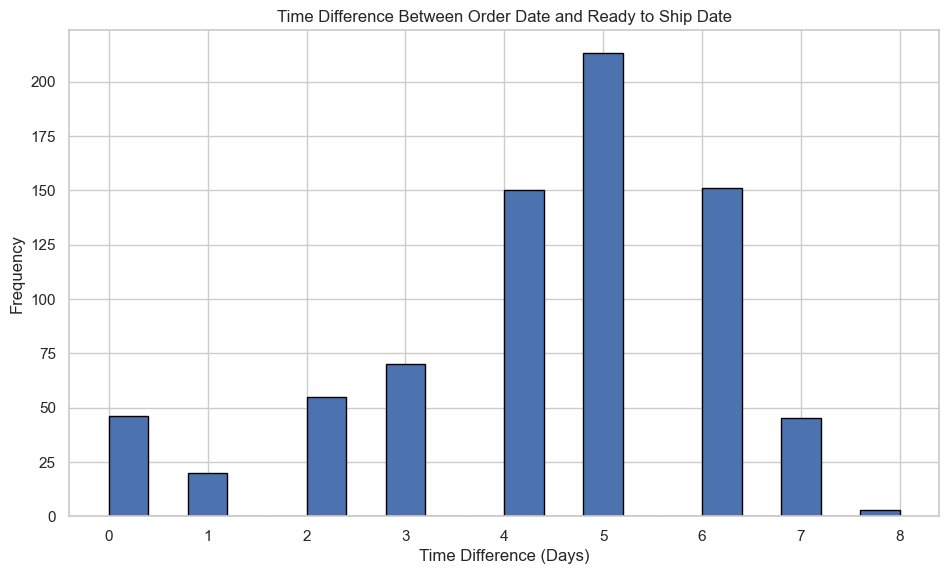

In [491]:
merged_df['Time Difference'] = (merged_df['Ready to Ship Date'] - merged_df['Order Date']).dt.days

# Display the relevant columns
result_df = merged_df[['Order ID', 'Order Date', 'Ready to Ship Date', 'Time Difference']]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(result_df['Time Difference'], bins=20, edgecolor='black')
plt.xlabel('Time Difference (Days)')
plt.ylabel('Frequency')
plt.title('Time Difference Between Order Date and Ready to Ship Date')

# Show the plot
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


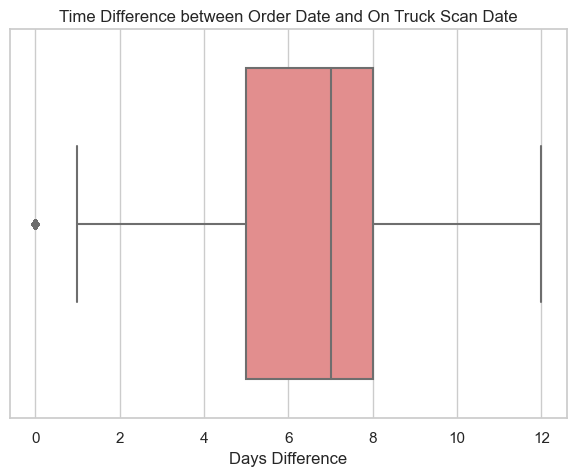

In [492]:
sns.boxplot(x=df_process_date['Time Difference'].dt.days, color='lightcoral')
plt.xlabel('Days Difference')
plt.title('Time Difference between Order Date and On Truck Scan Date')
plt.show()

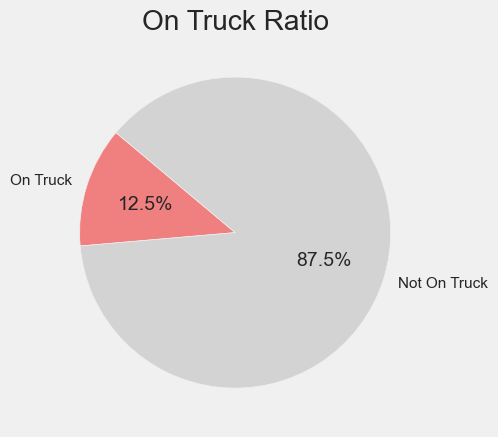

In [443]:
import matplotlib.pyplot as plt

# Assuming you have already calculated on_truck_ratio
on_truck_ratio = len(on_truck_orders) / total_orders * 100

# Create a pie chart
labels = ['On Truck', 'Not On Truck']
sizes = [on_truck_ratio, 100 - on_truck_ratio]
colors = ['lightcoral', 'lightgrey']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('On Truck Ratio')
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_c

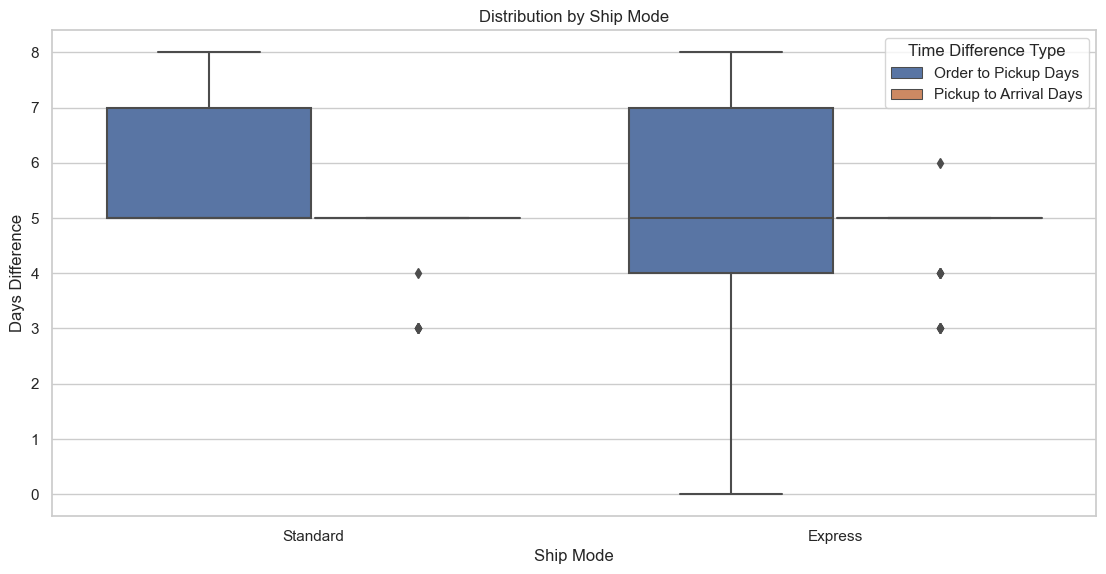

In [495]:
# Melt the DataFrame to long format for boxplot
plot_data = merged_df[['Ship Mode', 'Order to Pickup Days', 'Pickup to Arrival Days']]
melted_data = pd.melt(plot_data, id_vars='Ship Mode', var_name='Time Difference Type', value_name='Days Difference')

# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ship Mode', y='Days Difference', hue='Time Difference Type', data=melted_data)
plt.title('Distribution by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Days Difference')
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


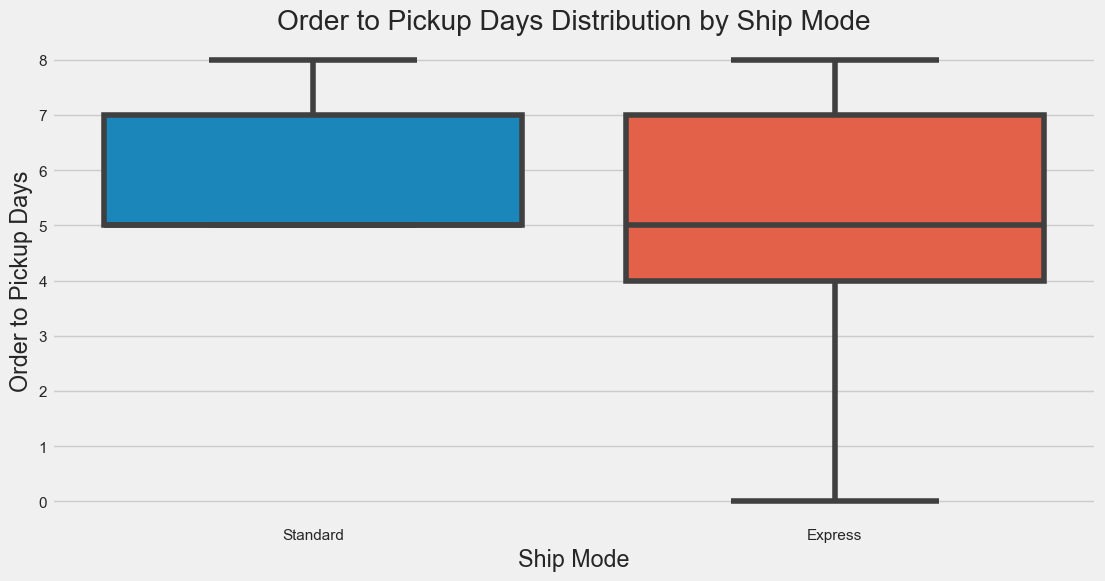

/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


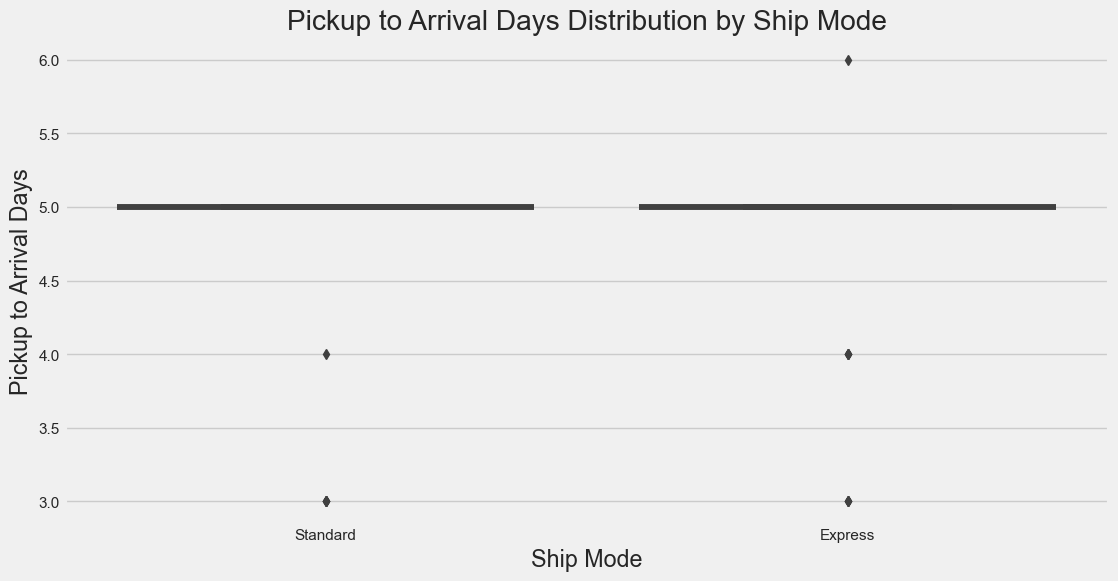

In [448]:
# Create a boxplot for 'Order to Pickup Days'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ship Mode', y='Order to Pickup Days', data=merged_df)
plt.title('Order to Pickup Days Distribution by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Order to Pickup Days')
plt.show()

# Create a boxplot for 'Pickup to Arrival Days'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ship Mode', y='Pickup to Arrival Days', data=merged_df)
plt.title('Pickup to Arrival Days Distribution by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Pickup to Arrival Days')
plt.show()

In [482]:
# Create a bar plot for minimum and maximum 'Time Difference' by 'Ship Mode'
plt.figure(figsize=(12, 6))

# Melt the result_df for better visualization
melted_result = pd.melt(result2_df, id_vars='Ship Mode', value_vars=['Order to Arrival Days'])

# Plot using seaborn barplot
sns.barplot(x='Ship Mode', y='value', data=melted_result, estimator=min, label='Minimum Time Difference')
sns.barplot(x='Ship Mode', y='value', data=melted_result, estimator=max, label='Maximum Time Difference')

plt.title('Minimum and Maximum Time Difference from Order Placement to Arrival by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Order to Arrival Days')
plt.legend(title=None)
plt.show()

KeyError: 'Ship Mode'

<Figure size 1200x600 with 0 Axes>

In [474]:
result2_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   (Ship Mode, )                 2 non-null      object
 1   (Order to Arrival Days, min)  2 non-null      int64 
 2   (Order to Arrival Days, max)  2 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 176.0+ bytes


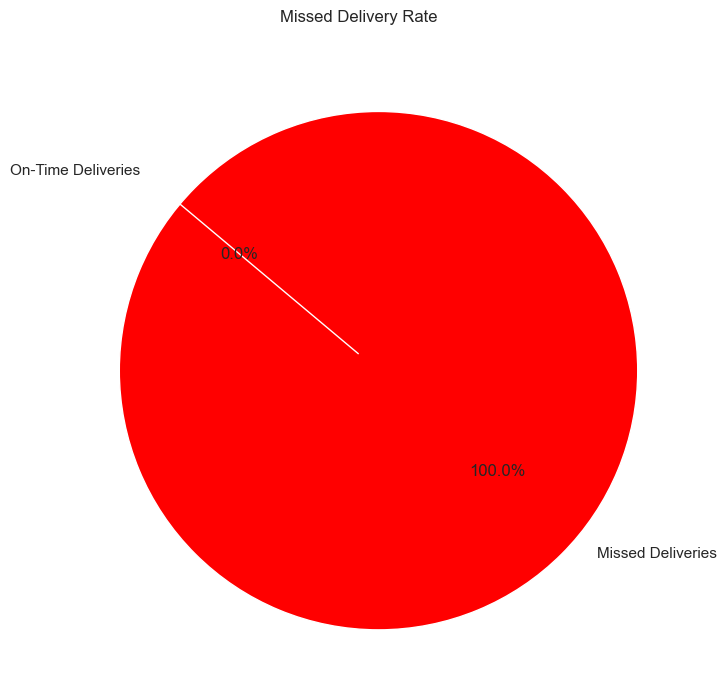

In [485]:
#Calculate the percentage of missed deliveries
missed_delivery_rate = (len(missed_deliveries) / len(merged_df)) * 100
on_time_delivery_rate = 100 - missed_delivery_rate

# Create a pie chart
labels = ['Missed Deliveries', 'On-Time Deliveries']
sizes = [missed_delivery_rate, on_time_delivery_rate]
colors = ['red', 'green']
explode = (0.1, 0)  # explode the first slice (Missed Deliveries)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Missed Delivery Rate')
plt.show()

Size of merged DataFrame: 753
Size of same-day ready-to-ship DataFrame: 46
Warehouse Processing Efficiency: 6.11%


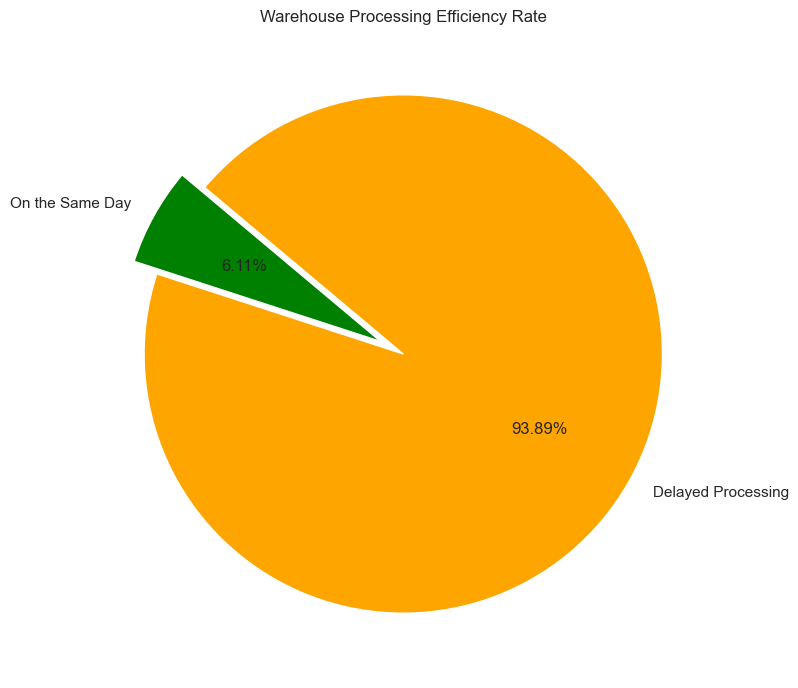

In [490]:
# Print the size of the merged DataFrame
print(f"Size of merged DataFrame: {len(merged_df)}")

# Filter orders where 'Ready to Ship Date' is on the same day as 'Order Date'
same_day_ready_to_ship = merged_df[merged_df['Ready to Ship Date'].dt.date == merged_df['Order Date'].dt.date]

# Print the size of the same-day ready-to-ship DataFrame
print(f"Size of same-day ready-to-ship DataFrame: {len(same_day_ready_to_ship)}")

# Calculate warehouse processing efficiency
warehouse_processing_efficiency = (len(same_day_ready_to_ship) / len(merged_df)) * 100

print(f"Warehouse Processing Efficiency: {warehouse_processing_efficiency:.2f}%")

# Create a pie chart
labels = ['On the Same Day', 'Delayed Processing']
sizes = [warehouse_processing_efficiency, 100 - warehouse_processing_efficiency]
colors = ['green', 'orange']
explode = (0.1, 0)  # explode the first slice (On the Same Day)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.title('Warehouse Processing Efficiency Rate')
plt.show()